**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1i-iG0jNQDjZ-DJKd_bpnXTPeS4b2OVR-?usp=sharing)





## Введение

Машинное обучение в обработке естественного языка традиционно выполняли с помощью рекуррентных нейронных сетей (RNN). Рекуррентные сети повысили уровень современной обработки естественного языка, но они также имеют ряд недостатков/узких мест:

1. Проблема исчезающих градиентов. 

RNN чувствительны к исчезающим градиентам. При обучении сети  используют метод обратного распространения ошибки. При этом веса последовательно пересчитываются от слоя к слою в обратном направлении.
Значения градиента экспоненциально уменьшаются по мере прохождения каждого шага, исчезая в конечном итоге. Особенно при работе с очень длинными последовательностями. Другими словами, начальные уровни почти ничего не получают при обучении.
2. То же самое и с памятью.

Скрытое состояние каждый раз передается на следующий шаг прогнозирования, постепенно забывая ранее полученную информацию. Это означает, что большая часть доступной контекстной информации связана с тем, что модель увидела за последние несколько шагов. Таким образом, нейронные сети сталкиваются с проблемой долговременной памяти. Они хороши для кратковременной памяти, но плохи для долговременной.
3. Обработка происходит последовательно. 

То есть каждое слово во фразе должно быть передано через рекуррентную сеть, после чего — прогноз. Рекуррентные  сети могут быть требовательны к вычислительным мощностям, поэтому  может потребоваться некоторое время, прежде чем будет сгенерирован выходной прогноз. Это неотъемлемая проблема RNN.

##Решение трех проблем

В 2010-х годах были исследованы сети с долговременной краткосрочной памятью LSTM, рекуррентные блоки GRU. Их применили для решения этих трех проблем. Например, в LSTM могут настраиваться механизмы запоминания новой информации, проброса на выход или забывания старой информации.

На основе этих сетей был изобретен механизм внимания, где вместо скрытого состояния предоставляется вектор контекста.  В нем содержится информация о каждом шаге анализа входной последовательности и последнем шаге генерации выходной последовательности. Проблемы с долговременной памятью стали меньше. 

Существенная проблема заключается в том, что обработка по-прежнему должна была последовательно выполняться, что создавало значительную ограниченность ресурсов при обучении модели для обработки естественного языка.

Изучение темы трансформеров тесно связано с моделью SequenceToSequence и механизмом **Atention** <br>
При желании вы можете ознакомиться или освежить свои знания по этим темам по ссылкам ниже:

[«Обработка текста. Модель Sequence-to-sequence»](https://colab.research.google.com/drive/1C72Oa4WU_Tq5lwYfru3lFndo7DD61LSX)

[«Обработка текста. Механизм Attention (Сети с вниманием)»](https://colab.research.google.com/drive/1Bg-UmpEz-T1HcH1CYXH7F4CwJF6asDwa?usp=sharing)

## Что такое трансформеры?

В знаковой работе 2017 года Ashish Vaswani и др. утверждали, что «внимание — это все, что вам нужно», другими словами, рекуррентные сети более не нужны в модели глубокого обучения, чтобы она действительно хорошо выполняла задачи обработки естественного языка. Они предложили новую архитектуру Transformer, которая способна поддерживать механизм внимания при параллельной обработке текстов. Все слова во фразе обрабатываются вместе, а не последовательно.

Эта архитектура устранила последнюю проблему из трех упомянутых выше, а именно, что предложения  должны обрабатываться последовательно, слово за словом, что требует больших вычислительных затрат. С Transformers параллелизм стал реальностью.

Существует множество разных архитектур на базе Transformer. Основываясь на традиционной архитектуре Transformer, исследователи и инженеры много экспериментировали и внесли свои изменения. Мы будем часто сталкиваться с разными версиями архитектуры. 

Оригинальная архитектура Transformer выглядит следующим образом:

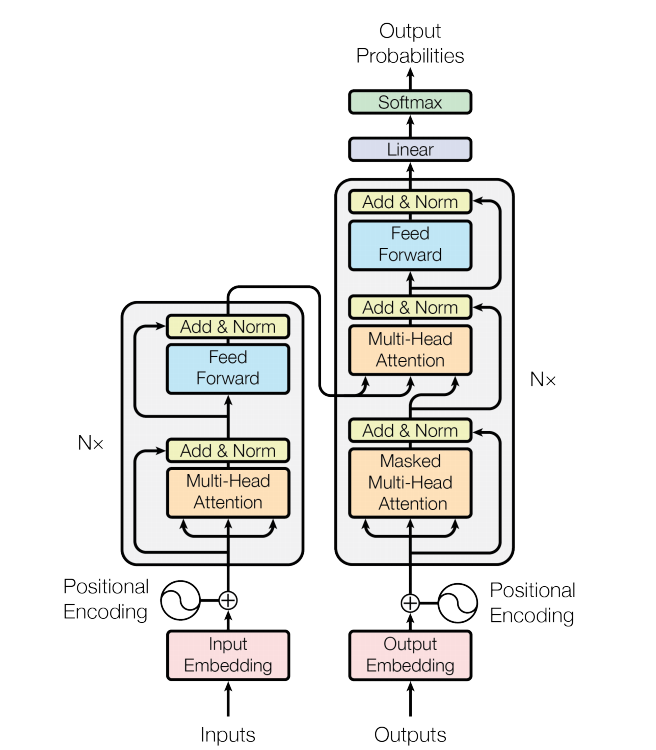

Трансформер — весьма большая и сложная структура, в которую стоит погружаться шаг за шагом. Начнем с примера переводчика с одного языка на другой.

### Структура Transformer

В самом общем виде трансформер — это кодер и декодер:

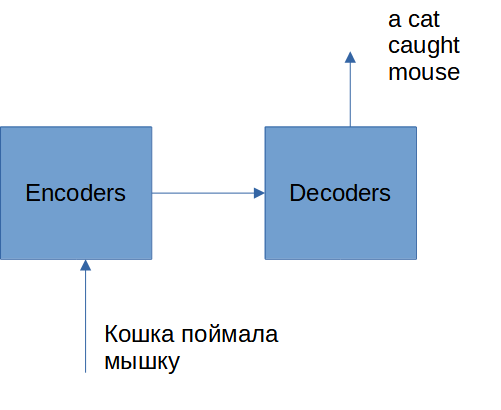

Видим давно знакомую структуру кодер-декодер. Только кодеров и декодеров стало больше. Теперь это блок кодеров и декодеров. Смотрим глубже:

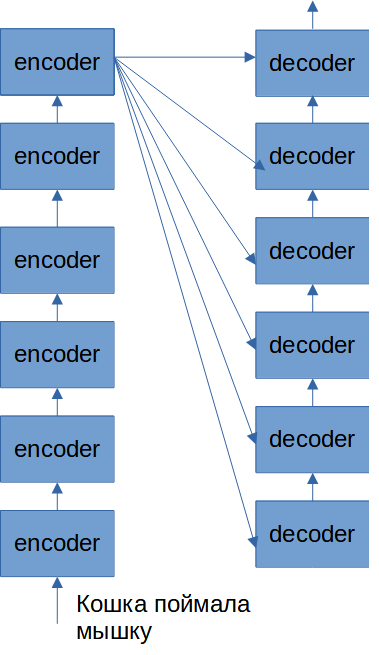

Блок кодеров и декодеров состоит из равного количества (обычно шести, но это совершенно необязательно) блоков.

## Кодеры

**Кодер** принимает входные предложения на исходном языке --> переводит каждое слово в вектор embedding-пространства --> выполняет позиционное  кодирование
--> находит взаимосвязи слов в предложении (attention) --> выводит некоторое промежуточное представление исходной фразы для декодера.

Разберем основные моменты.

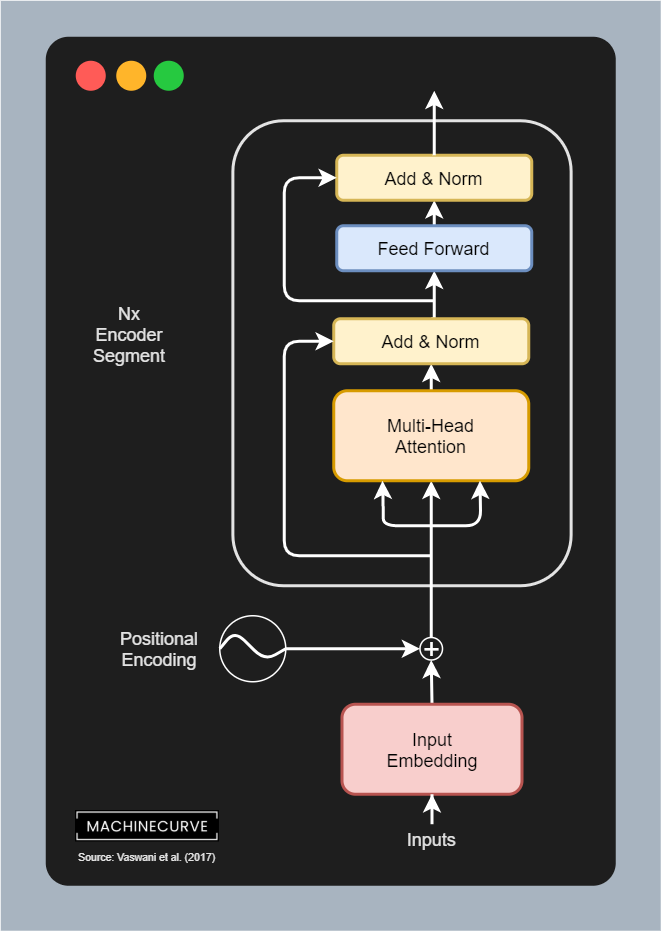

### Перевод в вектор Embedding-пространства

Мы не можем просто передавать текст в нейронную сеть. Надо заменить слова на числа, векторы, тензоры.... 

Шаг первый: токенизация. Токенизация — это простейший способ представить слово в виде числа. Собираем весь текст, находим список уникальных слов по частоте использования, каждому слову присваиваем индекс — токен. Этот процесс детально рассмотрен в предыдущих лекциях.

Обычно используют Tokenizer из модуля Keras. Например, из фразы `I go to the store` получаем список `[I, go, to, the, store]` и далее токены `[1, 2, 39, 49, 128]`.

Шаг второй: перевод в Embedding. Каждому токену сопоставляем свой уникальный вектор в N-мерном пространстве. Слово `go` -> токен `7`-> вектор `[0.1, 2.5,7.8]` — пример для трехмерного пространства.
При обучении трансформера были использованы векторы 512-мерного пространства.

### Позиционное кодирование (positional encoding)

В традиционных RNN фраза последовательно подается на вход сети. Поэтому сеть четко понимает, где первое слово, где последнее, и строит свое скрытое состояние в порядке поступления слов на вход.

На Transformer фраза поступает целиком в виде множества токенов или их отображений в embedding-пространстве. Отсюда необходимость в том, чтобы указывать нейронной сети порядковый номер каждого токена. Этот номер слова может быть получен из отсчетов гармонических функций `sin` и `cos`. Выражения для четной и нечетной позиций слова:

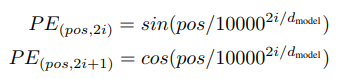

Где:
- `pos` — порядковый номер слова во фразе `[0...max]`.
- `Dmodel`— размер модели,  не очень маленькое число, например 512. Часто его принимают равным размерности пространства Embedding.
- `i` — пробегает от 0 до Dmodel-1. Т.е. код позиции — это не числа 0, 1, 2, а вектор с 512-ю элементами в диапазоне [-1,1].

На рис. ниже показан пример таких кодов для 50 позиций и размере модели 512:

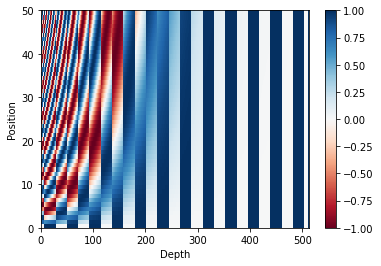

Каждое слово во фразе складывается с кодом позиции (или конкатенируется в зависимости от реализации).

1. Допустим на вход мы подали фразу `Cat is looking for a cat`.

2. Переведем фразу в токены (взяты для примера)
`34,67,123,66, 2,34`. Заметим,  что слово `Cat` у нас встретилось два раза. Человек сразу поймет, что речь идет о двух разных кошках, но для нейронки это всего лишь токен `34`, т.е. в предложении просто два экземпляра `Сat`. 

3. Пусть в embedding-пространстве токен `34` обозначен вектором `[12, 7, -3, 0 , 3]`. Позиционное кодирование добавит отсчеты синуса или косинуса к координатам вектора. Например: 
        (12.10, 6.9, -3.5, 0.6, 3.3)
        (12.05, 7.1, -3.7, 0.3, 2.7)

И вот мы уже имеем два разных вектора, связанных с `Сat`.  

Аналогично при встрече трех одинаковых слов в предложении мы получим три разных вектора в embedding-пространстве. В том, как связаны эти слова между собой и с другими словами, разберется блок Attention. 

Ниже пример того, как позиционное кодирование накладывается на Embedding:

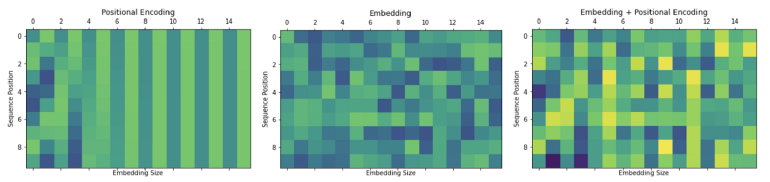

### Нахождение взаимосвязи слов в предложении (Attention)

Каждый сегмент кодировщика состоит из блока внимания с несколькими головами. Блок позволяет определить взаимосвязи между словами во входной фразе и состоит из нескольких параллельных  attention-слоев.

1. `Feedforward` (блок прямой связи). Обычно состоит из двух dense-слоев с функциями активации `relu` и  `linear`.

2. `Residual` — соединения охватывают блок Multi-Head Attention и feedforward и решают проблему исчезающего градиента на данном участке сети.

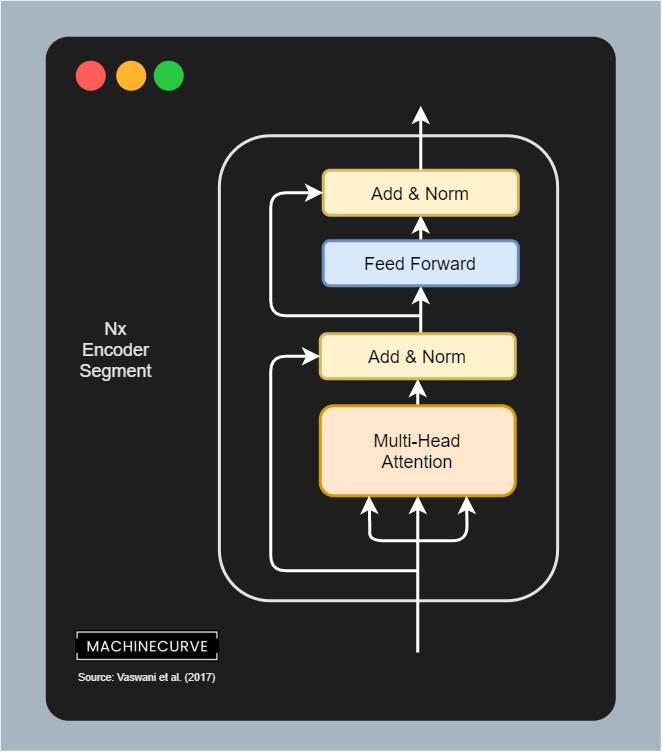

Рассмотрим подробнее отдельные компоненты сегмента кодировщика. Первый блок, через который будет проходить ввод — это блок внимания с несколькими головами. Он состоит из нескольких блоков внимания, включенных параллельно:


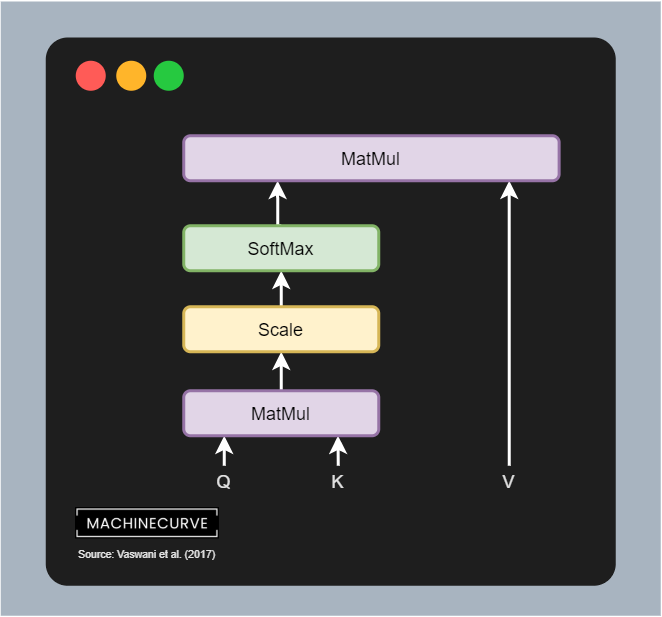

Он имеет три входа — запросы (Q), ключи (K) и значения (V). Входные векторы с позиционным кодированием поступают сразу на три входа и получают различные веса при помощи трех различных dense (linear) слоев.

Концепции ключа/значения/запроса исходят из поисковых систем. Например, если мы вводим запрос для поиска некоторого видео на YouTube, поисковая система сопоставляет  запрос  с набором  ключей  (название видео, описание и т.д.), связанных с видео-кандидатами в базе данных, а затем представляет нам наиболее подходящее видео (значения).

Например, запрос — «найди машины», ключи — «быстрые, красные». Подходящее значение — «новые Феррари».


**Рассмотрим, как работает Attention**

Пусть на вход блока поступает фраза `I am doing ok` (в виде векторов!). 

1. Она поступает сразу на три входа,  образуя векторы  Q, K, V. 
2. Каждый вектор взвешивается своим dense-слоем. 
3. Векторы Q и K перемножаются и нормируются. 
4. Получаем матрицу оценок. Она показывает важность, на которую нужно обратить внимание — связи слов в предложении.

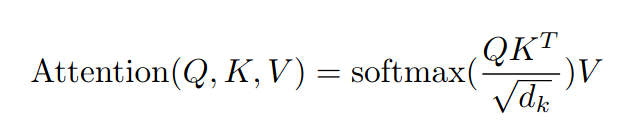

Пусть наша фраза в embedding-пространстве имеет вид:

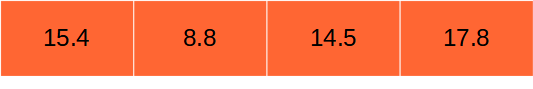

Например, матрица оценок имеет вид на рис. снизу. Она показывает взаимосвязи слов в предложении, как каждое слово коррелирует с каждым числом:

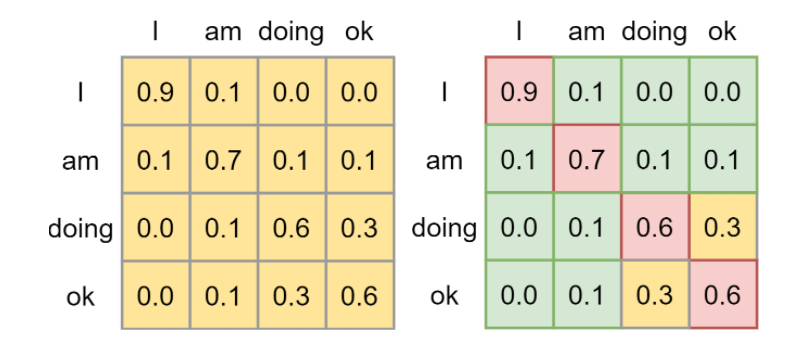

Далее выполняем Softmax и умножение матрицы оценок на вектор V — взвешенную начальную фразу. Каждое слово в предложении оценивается по важности коэффициентами матрицы оценок. 

Наша фраза с учетом внимания:

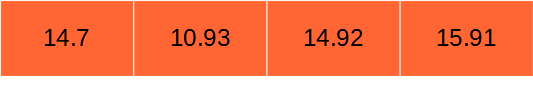

Данную операцию проще интерпретировать следующим образом:
1. Есть знакомая фраза `I am doing ok`. 
2. Сначала составим матрицу весов — выясним связи слов в предложении. 
3. Затем отметим эти важные слова в исходной фразе. 

Вся магия заключается в том, что при обучении сеть сама делает предположения о важности слов, чтобы получить наилучший перевод текста. Сеть сама для себя вырабатывает мнение о фразе. Поэтому данный вид Attention и называется Self-attention.
 

#### Многоголовое внимание (Multi-Head Attention)

Это блок, который объединяет несколько блоков attention (каждый называется головой внимания), соединенных параллельно. В каждом attention-блоке dense (linear) слои по-своему взвешивают входные фразы. Мы можем получить несколько вариантов запросов, ключей, значений и матриц оценок на выходе.

Проще говоря, рассматривая какую-либо проблему под разными углами, а не с одного, мы получаем разные представления о ней. 

Аналогично Transformer, получая различные представления о фразе, может выделить ее разные свойства. Например, одна голова скажет о настроении, другая о времени действия, третья укажет на действующее лицо.

В этом заключается смысл использования сразу нескольких блоков Attention.





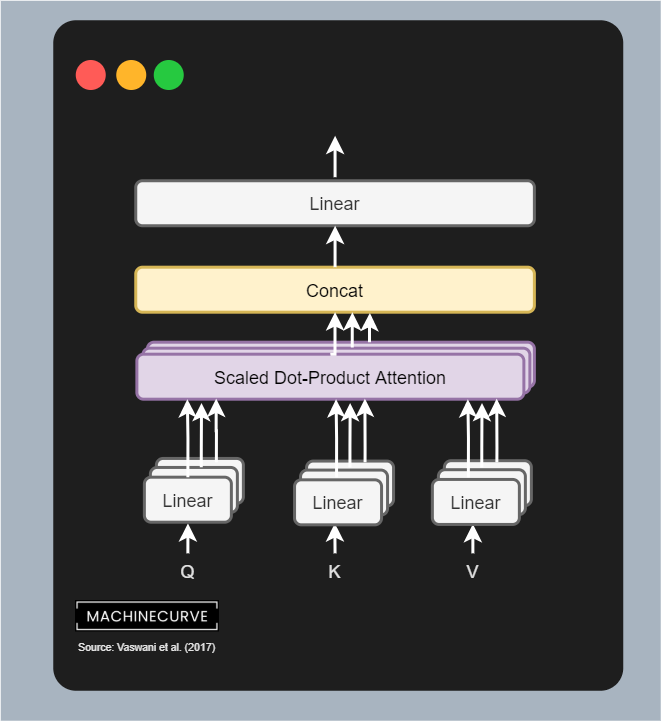

#### Добавление Residual-ветки и нормализации слоя

Входная фраза прокидывается на выход блока Multi-Head Attention, где складывается с выходом блока. Далее фраза поступает на слой нормализации. Добавление остаточной (Residual) связи и применение нормализации уровня стабилизируют процесс обучения.

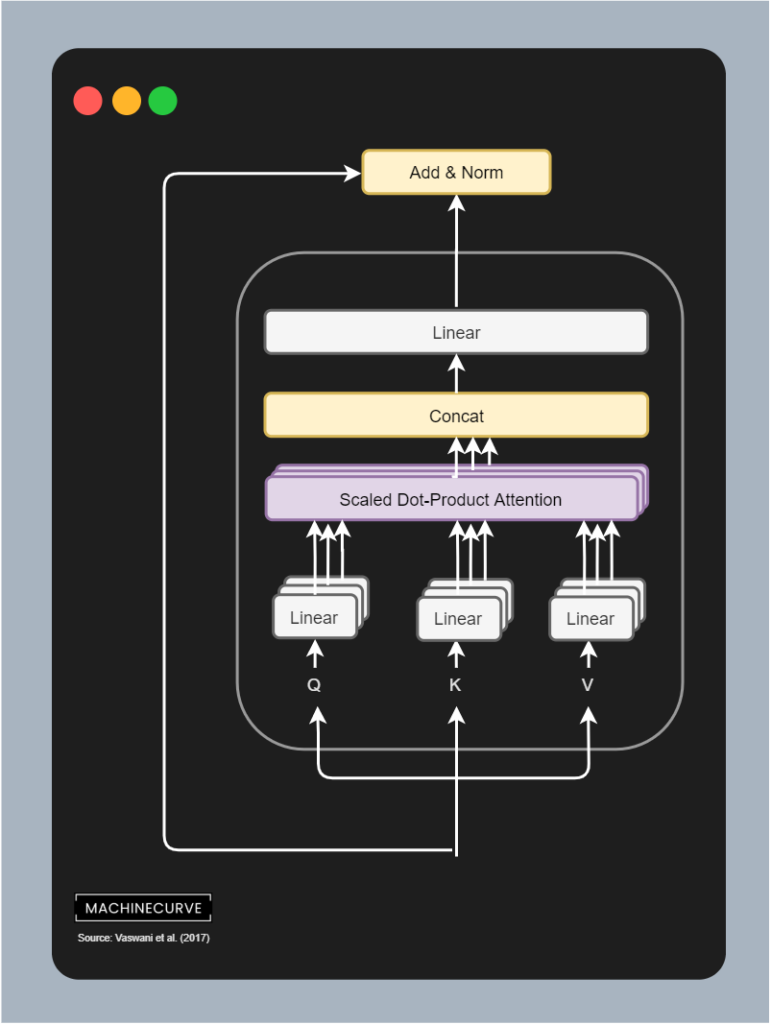

#### Слой Feedforward

После завершения нормализации слоя данные передаются набору слоев feedforward. Каждая сеть прямого распространения содержит два уровня Dense с одной функцией активации ReLU между ними и охвачена residual-связью. На выходе — блок нормализации.

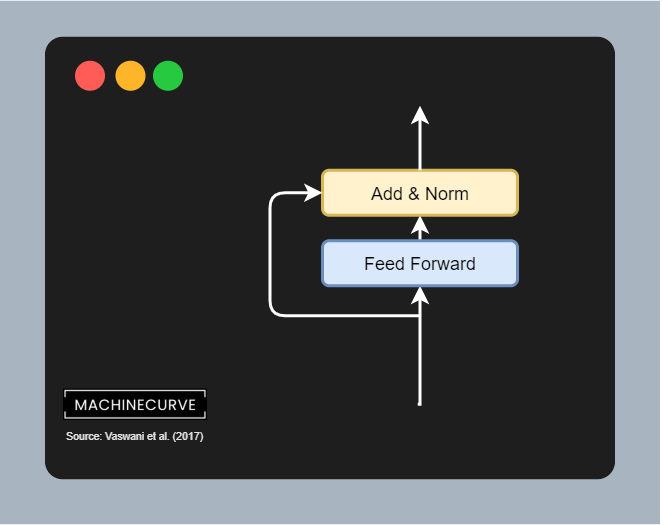

Хорошо, пока мы понимаем, как работает сегмент кодировщика, то есть как входные данные преобразуются в промежуточное представление. 




## Декодер

Давайте теперь посмотрим на сегмент декодера. Этот сегмент Transformer отвечает за преобразование промежуточного многомерного представления в вектор выходных токенов — перевод исходной фразы. 

Визуально это представлено на рисунке снизу. Декодер сильно напоминает кодер, он собран из тех же кирпичиков:

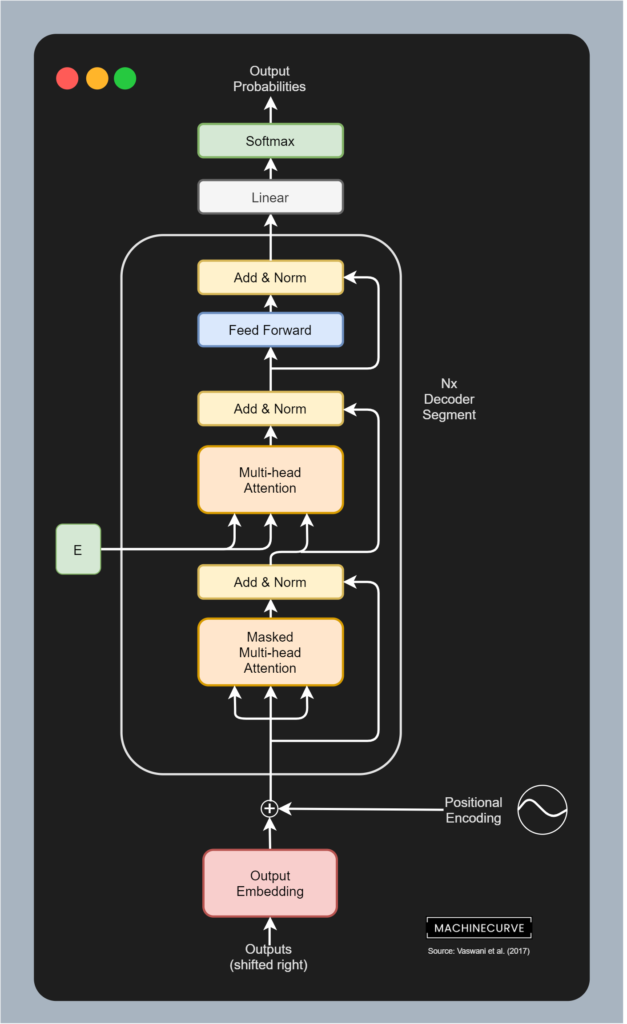

### Embedding

Как и в кодере, фразы в декодере проходят токенизацию, преобразование в векторы Embedding-пространства.




### Позиционное кодирование

Точно такое же позиционное кодирование на основе синуса и косинуса выполняется в сегменте декодера, как и в сегменте кодера.

### Нахождение взаимосвязи 

Новыми для нас блоками будут:
- `masked multi-head attention`;
- `multi-head attention` с входом от кодера.


#### Masked Multi-Head Attention


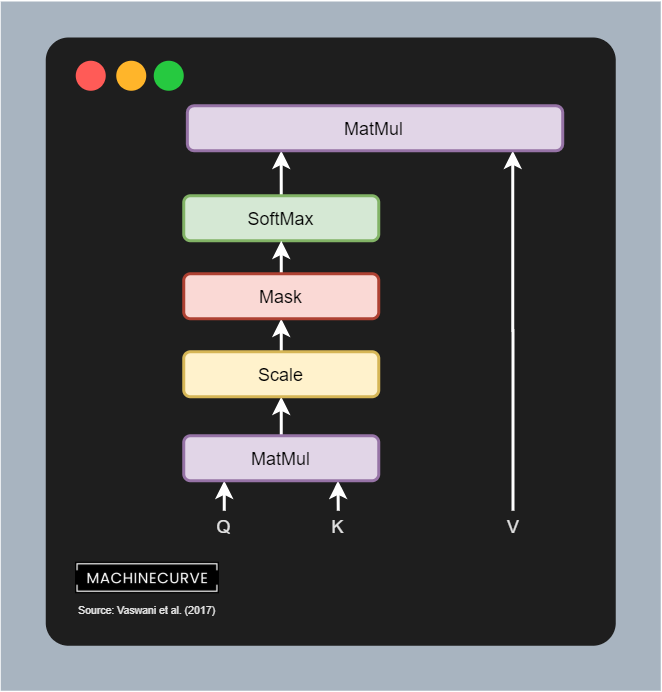

В кодере мы уже видели данный блок, но здесь мы видим Mask — новый слой.


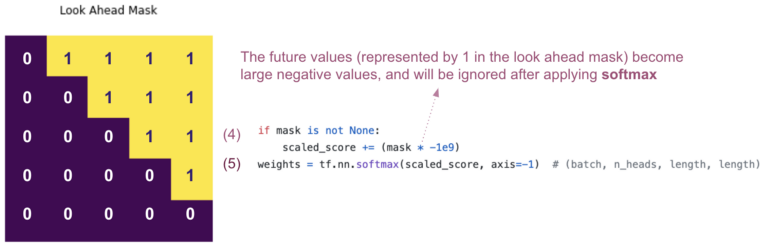

>Забежим немного вперед и узнаем, зачем тут маска. 

При генерации предложения декодер получает на вход только `< start >` и часть уже сгенерированной фразы. Окончание фразы еще неизвестно. Он продолжает генерировать фразу, имея в распоряжении только ее начало. Окончания еще нет — оно в будущем.

Однако при обучении мы подаем ему сразу всю фразу. Поэтому он может (и будет) учиться генерировать фразу, зная ее целиком. Чтобы запретить декодеру смотреть вперед в будущее, модель использует замаскированное Attention: будущие токены замаскированы.



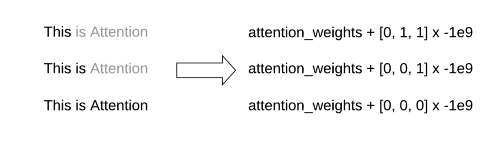

Иными словами, при обучении декодер ищет взаимосвязи первого слова с первым, первого и второго с первым и вторым и т.д. Взаимосвязи со словами из будущего он не получает.

#### Multi-Head Attention с входом от кодера

Второй Multi-Head Attention в  декодере — attention-блок с входом от кодера. Векторы Q и K поступают от кодера, в то время как V — от предыдущих слоев декодера.

Декодер воспринимает фразу на некотором внутреннем языке кодера. Он находит взаимосвязь между фразой, входной для кодера и той, которую необходимо предсказать. То есть указывает на важные для кодера слова в формируемой фразе. 


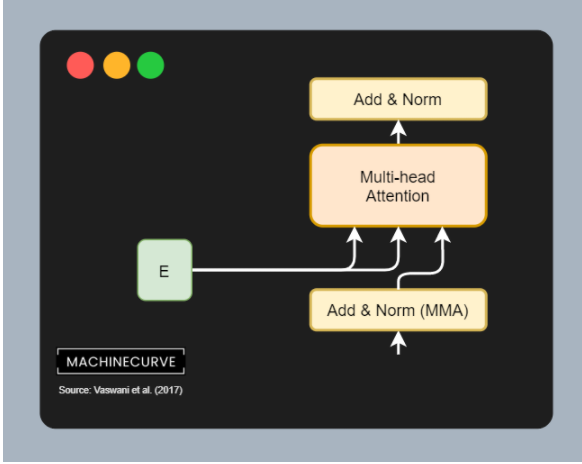

## Аналогия переводчиков

Предположим, что наша цель — построить языковую модель, способную переводить немецкий текст на английский. В классическом сценарии с более стандартными подходами мы бы изучили модель, которая способна переводить напрямую. Другими словами, мы обучаем одного переводчика переводить с немецкого на английский. Переводчик же должен свободно говорить на обоих языках, понимать отношения между словами на двух языках и так далее. 

Transformers работают по-другому, потому что они используют архитектуру кодировщика-декодера. Можно представить, как будто вы работаете с двумя переводчиками. Первый способен переводить немецкий на какой-то промежуточный универсальный язык. Другой может перевести этот язык на английский. В каждой задаче перевода вы сделаете перевод через промежуточный язык. Это будет работать так же, как и классические подходы (с точки зрения того, дает ли модель какой-либо полезный результат). Однако он также масштабируемый: мы можем использовать промежуточный язык для обучения модели, например обобщению текста. Нам больше не нужно тренироваться для выполнения первой задачи по переводу.



### Подготовка данных

Прежде всего мы готовим входные и целевые массивы из двух языковых доменов: немецкий как источник и английский как целевой. Предложения ввода и вывода токенизируются, а токены — индексируются. 

**Обратите внимание:** существует только один входной массив кодировщика, но два массива для декодера. Целевой выходной массив находится на один временной шаг вперед по сравнению с целевым входным массивом. Этого можно достичь, если добавить начальный токен в начало целевой последовательности, чтобы получить целевой ввод и конечный токен в конце целевой последовательности для получения целевого вывода. Чтобы последовательности были одинаковой длины можно применить заполнение постов нулями.

В зависимости от конкретных проблем и приложений необработанный текст иногда требует дополнительной очистки перед прохождением вышеупомянутого процесса подготовки данных. Она может заключаться в преобразовании букв в нижний регистр, удалении специальных символов и стоп-слов.

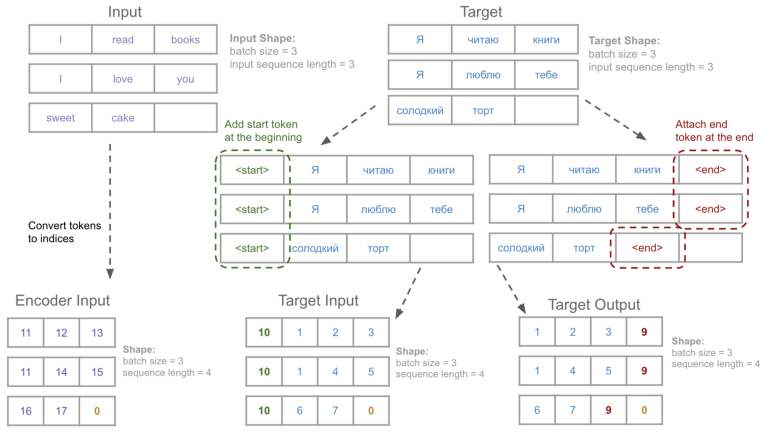

## Обучение и работа Transformer

### Обучение

Тренировочный процесс довольно прост:
1. Подаем в преобразователь весь входной массив кодировщика и весь целевой входной массив, чтобы получить словарную вероятность.
2. Сравниваем словарный массив вероятностей с целевым выходным массивом и вычисляем разреженную перекрестную потерю энтропии.
3. Обратно распространяем потери. Этот процесс повторяется для каждого батча обучающих данных на каждой эпохе, пока модель не будет достаточно обучена.


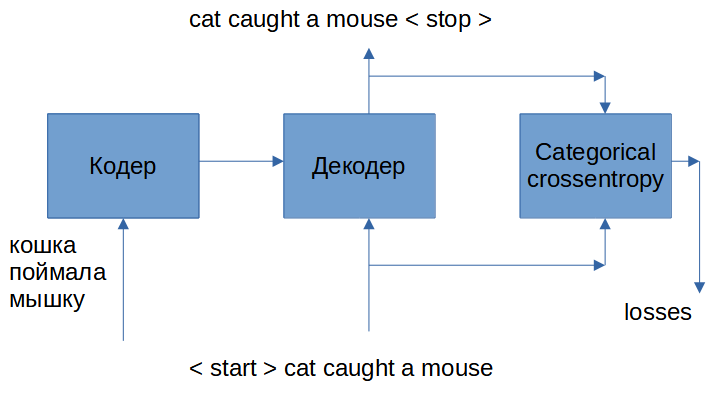

### Режим предсказания


На первом шаге скормим кодеру переводимое предложение. Получим фразу на промежуточном языке. На декодер подадим слово `< start >`, получаем — `Cat`.

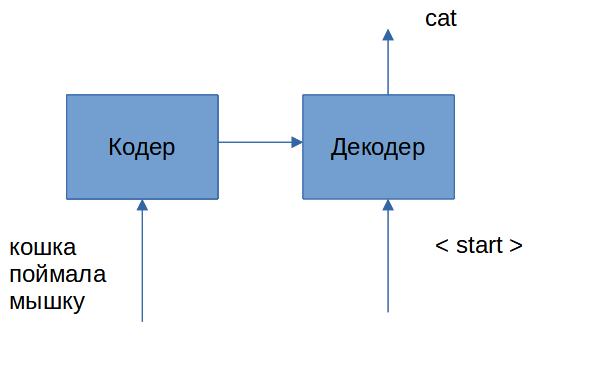

Шаг второй. Собираем вместе `< start >` и первое предсказанное слово и подаем на вход декодера. Получаем `Dog caught`. Из этой фразы берем последнее слово `Caught`.

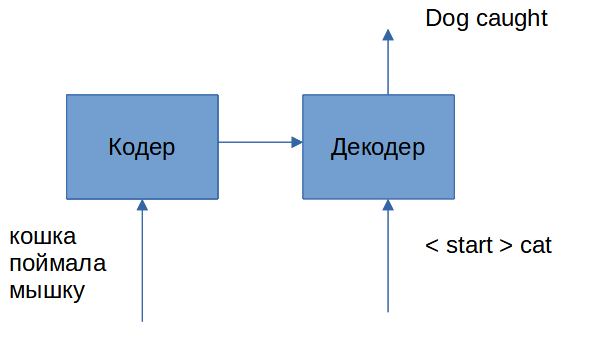

Шаг 3. Собираем входную фразу `< start > Cat caught a`.

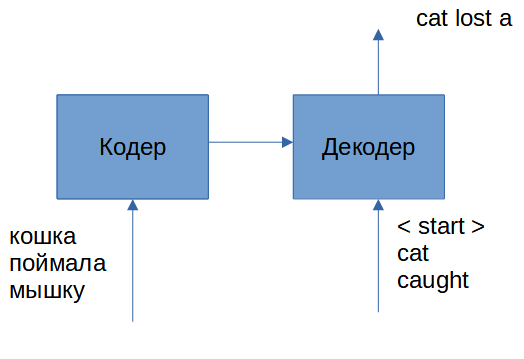

Шаг последний. Дожидаемся слова `< stop >` в конце фразы или превышения ожидаемой длины фразы на выходе.



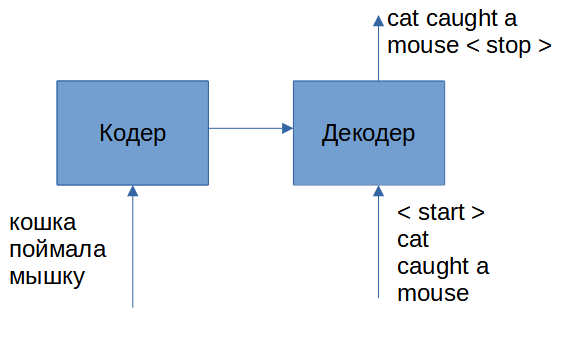

Осталось лишь проконтролировать, чтобы токены `< start >` и `< stop >` не попали в финальную фразу.

**Содержание темы**

1. Теория

2. [Практика](https://colab.research.google.com/drive/1yXSmj5ho71PjNEYZsqmXWRuq6WfMQzBN?usp=sharing)



